# Purpose and Scope of the EDA


In [1]:
# Import Libraries 
import pandas as pd
import numpy as np
from scipy import stats 
from mlxtend.preprocessing import minmax_scaling
import seaborn as sns
import missingno
import matplotlib.pyplot as plt
import networkx as nx
from mpl_toolkits.mplot3d import Axes3D


In [2]:
df = pd.read_csv('fuel imports.csv') 
df

,tradetype,districtofficecode,districtofficename,countryoforigin,countryoforiginname,countryofdestination,countryofdestinationname,tariff,statisticalunit,transportcode,...,yearmonth,calendaryear,section,sectionanddescription,chapter,chapteranddescription,tariffanddescription,statisticalquantity,customsvalue,worldregion
0,Imports,CTN,Cape Town,NG,Nigeria,ZA,South Africa,27090000,KG,0,...,201003,2010,5,5 - Mineral Products,27,"27 - Crude, Coal, Petroleum and Electricity",27090000 - Petroleum Oils And Oils Obtained Fr...,1.203726e+08,546876249,AFRICA
1,Imports,CTN,Cape Town,US,United States,ZA,South Africa,27121020,KG,0,...,201003,2010,5,5 - Mineral Products,27,"27 - Crude, Coal, Petroleum and Electricity",27121020 - In immediate packings of a content...,1.300000e+01,3469,AMERICA
2,Imports,CTN,Cape Town,US,United States,ZA,South Africa,27030000,KG,0,...,201003,2010,5,5 - Mineral Products,27,"27 - Crude, Coal, Petroleum and Electricity","27030000 - Peat (Including Peat Litter), Wheth...",2.031200e+04,69173,AMERICA
3,Imports,CTN,Cape Town,US,United States,ZA,South Africa,27101147,KG,0,...,201003,2010,5,5 - Mineral Products,27,"27 - Crude, Coal, Petroleum and Electricity",27101147 - Lubricating grease,2.800000e+02,39823,AMERICA
4,Imports,CTN,Cape Town,PT,Portugal,ZA,South Africa,27121020,KG,0,...,201003,2010,5,5 - Mineral Products,27,"27 - Crude, Coal, Petroleum and Electricity",27121020 - In immediate packings of a content...,3.000000e+01,703,EUROPE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Imports,CTN,Cape Town,CA,Canada,ZA,South Africa,27101900,KG,0,...,201004,2010,5,5 - Mineral Products,27,"27 - Crude, Coal, Petroleum and Electricity",27101900 - Other,3.447620e+04,811292,AMERICA
996,Imports,DBN,Durban,CA,Canada,ZA,South Africa,27030000,KG,0,...,201004,2010,5,5 - Mineral Products,27,"27 - Crude, Coal, Petroleum and Electricity","27030000 - Peat (Including Peat Litter), Wheth...",5.173100e+04,192365,AMERICA
997,Imports,CTN,Cape Town,IT,Italy,ZA,South Africa,27111310,KG,0,...,201004,2010,5,5 - Mineral Products,27,"27 - Crude, Coal, Petroleum and Electricity",27111310 - In immediate packings of a content ...,1.740400e+02,15289,EUROPE
998,Imports,CTN,Cape Town,NL,Netherlands,ZA,South Africa,27101900,KG,0,...,201004,2010,5,5 - Mineral Products,27,"27 - Crude, Coal, Petroleum and Electricity",27101900 - Other,2.722000e+03,84750,EUROPE


In [3]:
df.describe()

,tariff,transportcode,yearmonth,calendaryear,section,chapter,statisticalquantity,customsvalue
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.0,1000.0,1.000000e+03,1.000000e+03
mean,2.709387e+07,0.456000,201003.034000,2010.005000,5.0,27.0,8.988834e+06,3.577056e+07
std,3.230312e+04,1.072014,7.187803,0.070569,0.0,0.0,4.615116e+07,1.863120e+08
min,2.701110e+07,0.000000,201001.000000,2010.000000,5.0,27.0,1.200000e-01,8.000000e+00
25%,2.710110e+07,0.000000,201002.000000,2010.000000,5.0,27.0,1.250000e+02,8.688750e+03
50%,2.710115e+07,0.000000,201003.000000,2010.000000,5.0,27.0,7.939840e+03,8.311650e+04
75%,2.710190e+07,0.000000,201003.000000,2010.000000,5.0,27.0,8.306340e+04,6.563300e+05
max,2.716000e+07,3.000000,201106.000000,2011.000000,5.0,27.0,5.205190e+08,2.245123e+09


# Data Cleaning and Preparation

In [4]:
# get the number of missing data points per column
missing_values_count = df.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:21]


tradetype                    0
districtofficecode           0
districtofficename           0
countryoforigin             40
countryoforiginname          0
countryofdestination         0
countryofdestinationname     0
tariff                       0
statisticalunit              0
transportcode                0
transportcodedescription     0
yearmonth                    0
calendaryear                 0
section                      0
sectionanddescription        0
chapter                      0
chapteranddescription        0
tariffanddescription         0
statisticalquantity          0
customsvalue                 0
worldregion                  0
dtype: int64

In [5]:
# Drop the country of origin column
#df.drop(["countryoforigin"],axis = 1, inplace = True)
# Because This is the only column that contains missing values 

In [6]:
# Drop the following columns
df.drop(["districtofficecode","transportcode", "countryofdestination"],axis = 1, inplace = True)

In [7]:
df.drop(["countryofdestinationname","transportcodedescription", "sectionanddescription","section","chapteranddescription","tariffanddescription"],axis = 1, inplace = True)

In [8]:
# Drop the following columns
df.drop(["trade_type","unit", "chapter_code"],axis = 1, inplace = True)
df.drop(["countryoforigin"],axis = 1, inplace = True)

KeyError: "['trade_type', 'unit', 'chapter_code'] not found in axis"

In [9]:

# check for duplicates
duplicate_rows = df.duplicated()
print(duplicate_rows)

# count the number of duplicates
print(duplicate_rows.sum())

# remove duplicates
df.drop_duplicates(inplace=True)

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool
0


In [10]:
new_column_names = {
    "tradetype": "trade_type",
    "districtofficename": "district_name",
    "countryoforiginname": "origin_country",
    "tariff": "tariff_code",
    "statisticalunit": "unit",
    "yearmonth": "year_month",
    "calendaryear": "year",
    "chapter": "chapter_code",
    "statisticalquantity": "quantity",
    "customsvalue": "value",
    "worldregion": "region"
}

df = df.rename(columns=new_column_names)


In [11]:
df # view the dataset to see if the changes were made

,trade_type,district_name,countryoforigin,origin_country,tariff_code,unit,year_month,year,chapter_code,quantity,value,region
0,Imports,Cape Town,NG,Nigeria,27090000,KG,201003,2010,27,1.203726e+08,546876249,AFRICA
1,Imports,Cape Town,US,United States,27121020,KG,201003,2010,27,1.300000e+01,3469,AMERICA
2,Imports,Cape Town,US,United States,27030000,KG,201003,2010,27,2.031200e+04,69173,AMERICA
3,Imports,Cape Town,US,United States,27101147,KG,201003,2010,27,2.800000e+02,39823,AMERICA
4,Imports,Cape Town,PT,Portugal,27121020,KG,201003,2010,27,3.000000e+01,703,EUROPE
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Imports,Cape Town,CA,Canada,27101900,KG,201004,2010,27,3.447620e+04,811292,AMERICA
996,Imports,Durban,CA,Canada,27030000,KG,201004,2010,27,5.173100e+04,192365,AMERICA
997,Imports,Cape Town,IT,Italy,27111310,KG,201004,2010,27,1.740400e+02,15289,EUROPE
998,Imports,Cape Town,NL,Netherlands,27101900,KG,201004,2010,27,2.722000e+03,84750,EUROPE


# Data Analysis and Visualisation

# 1. Univeriate analysis

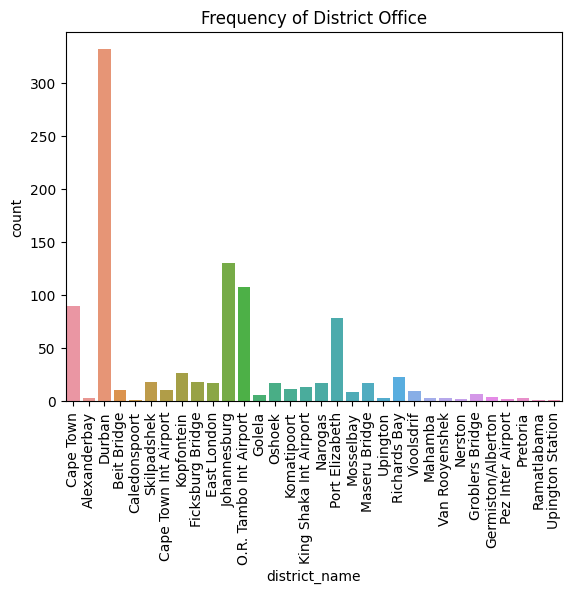

In [12]:
# plot the frequency of each district office
sns.countplot(x='district_name', data=df)
plt.xticks(rotation=90)
plt.title('Frequency of District Office')
plt.show()


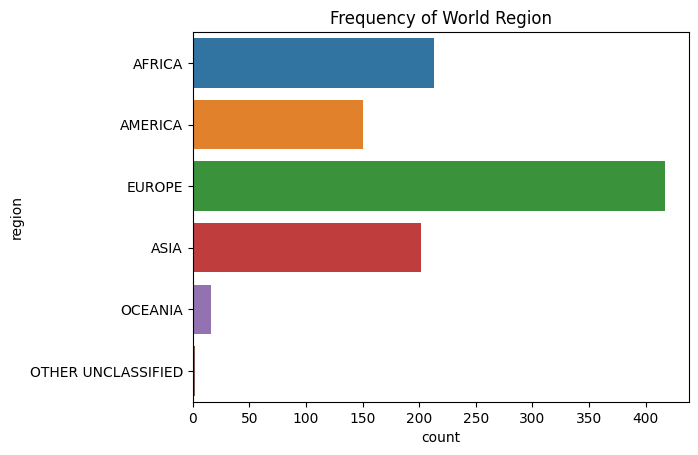

In [13]:
# Plot the frequency of each world region

sns.countplot(y='region', data=df)
plt.title('Frequency of World Region')
plt.show()


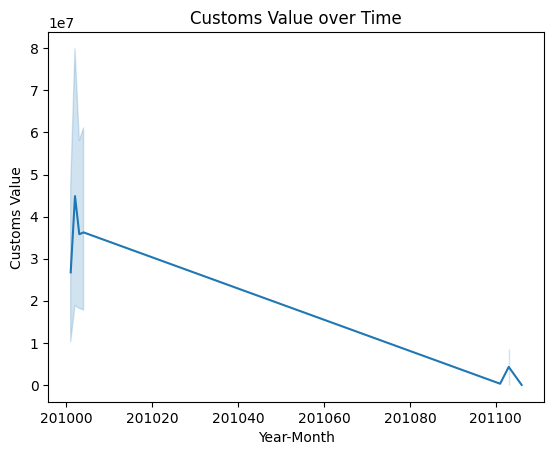

In [14]:
#create a line chart to show how the customs value has changed over time
sns.lineplot(x='year_month', y='value', data=df)
plt.title('Customs Value over Time')
plt.xlabel('Year-Month')
plt.ylabel('Customs Value')
plt.show()

# 2. Bivariate analysis

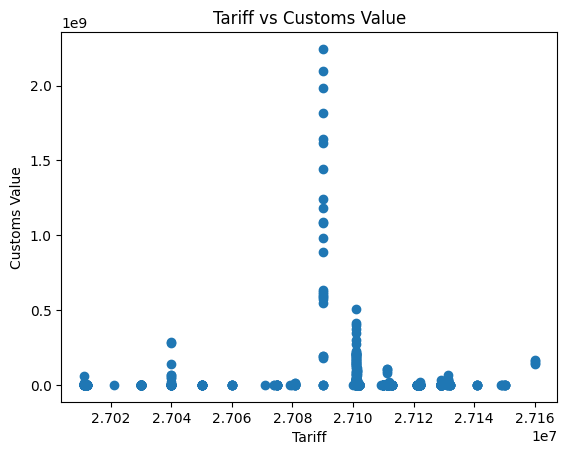

In [15]:
#Tariff vs Customs Value: Scatterplot
plt.scatter(df['tariff_code'], df['value'])
plt.xlabel('Tariff')
plt.ylabel('Customs Value')
plt.title('Tariff vs Customs Value')
plt.show()

In [16]:
# Check for the correlation coefficient
corr_coeff = df["tariff_code"].corr(df["value"])

print(corr_coeff)

-0.004630764277699427


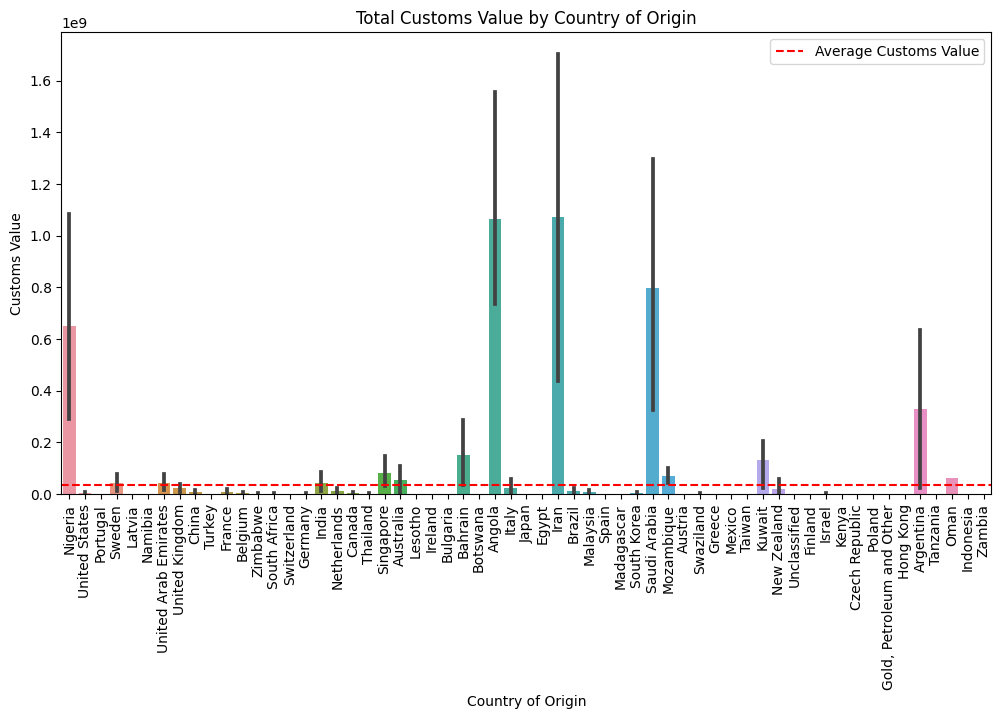

In [17]:
#Country of Origin vs Customs Value:Bar plot
plt.figure(figsize=(12,6))
sns.barplot(x='origin_country', y='value', data=df)
plt.axhline(y=df['value'].mean(), color='red', linestyle='--', label='Average Customs Value')
plt.xticks(rotation=90)
plt.xlabel('Country of Origin')
plt.ylabel('Customs Value')
plt.title('Total Customs Value by Country of Origin')
plt.legend()
plt.show()

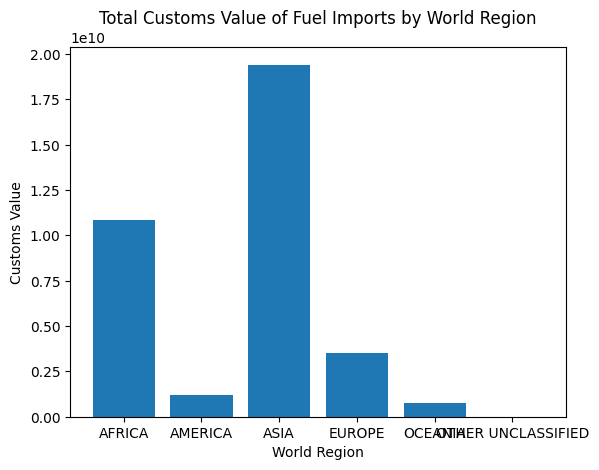

In [18]:
# World Region vs Customs Value:bar plot

# group the dataset by world region and calculate the total customs value for each region
region_customs = df.groupby('region')['value'].sum().reset_index()

# create a bar plot
plt.bar(region_customs['region'], region_customs['value'])
plt.title('Total Customs Value of Fuel Imports by World Region')
plt.xlabel('World Region')
plt.ylabel('Customs Value')
plt.show()

In [73]:
# Check if the are rows that have middle east in the region column
middle_east_df = df[df["region"] == "Middle East"]
print(middle_east_df)

Empty DataFrame
Columns: [trade_type, district_name, origin_country, tariff_code, unit, year_month, year, chapter_code, quantity, value, region]
Index: []


In [19]:
# Let check which region is Oman saved under 
Country_df = df[df["origin_country"] == "Oman"]
print(Country_df)



    trade_type district_name origin_country  tariff_code unit  year_month  \
905    Imports        Durban           Oman     27101102   KG      201004   

     year  chapter_code    quantity     value region  
905  2010            27  10870210.0  63538636   ASIA  


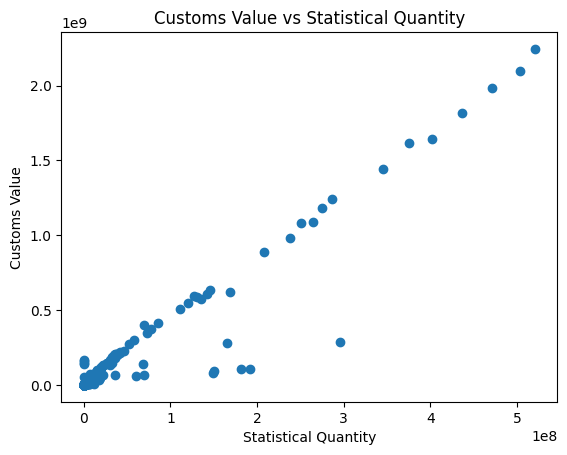

In [25]:
# Customs Value Vs Statistical Quantity: Scatterplot
plt.scatter(df['quantity'], df['value'])
plt.title('Customs Value vs Statistical Quantity')
plt.xlabel('Statistical Quantity')
plt.ylabel('Customs Value')
plt.show()

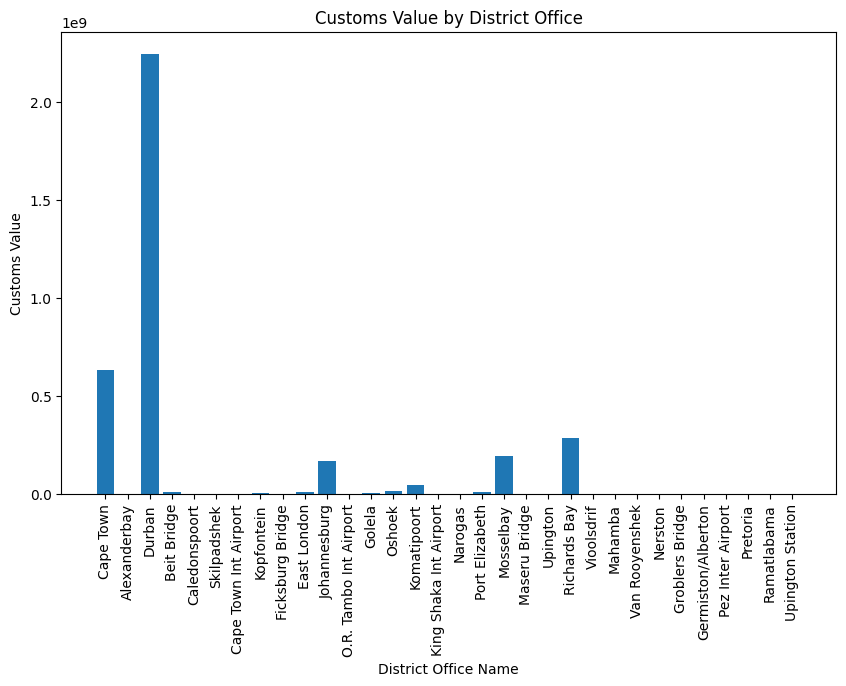

In [21]:
#District Office Name vs Customs Value: bar plot

plt.figure(figsize=(10, 6))
plt.bar(df['district_name'], df['value'])
plt.title('Customs Value by District Office')
plt.xlabel('District Office Name')
plt.ylabel('Customs Value')
plt.xticks(rotation=90)
plt.show()

#  3. Story

# Conclusion